In [6]:
# Upload file langsung di Google Colab
from google.colab import files
uploaded = files.upload()

Saving Daftar_Lagu_Capstone.csv to Daftar_Lagu_Capstone.csv


In [7]:
# Lanjut baca file pakai pandas
import pandas as pd

In [8]:
# Ganti dengan nama file yang kamu upload
df = pd.read_csv('Daftar_Lagu_Capstone.csv')

In [9]:
# Lihat isi awal datanya
df.head()

,Tanggal,Judul Lagu,Artis,Galau (Ya/Tidak)
0,1/1/2022,How Does It Feel To Be Forgotten,"Selena Gomez, benny blanco",Ya
1,1/2/2022,Backburner,NIKI,Ya
2,1/3/2022,Cola,Lana Del Rey,Ya
3,1/4/2022,No One Noticed,The Marias,Ya
4,1/5/2022,Ojos Tristes,"Selena Gomez, benny blanco, The Marias",Ya


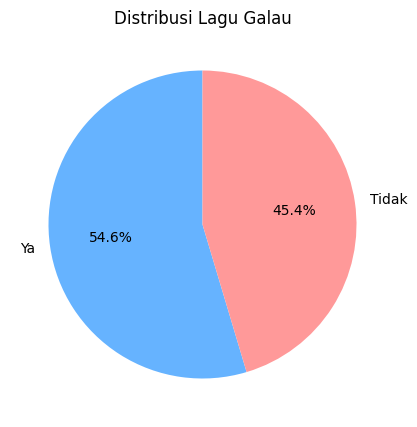

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
df['Galau (Ya/Tidak)'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff9999']
)
plt.title('Distribusi Lagu Galau')
plt.ylabel('')
plt.show()

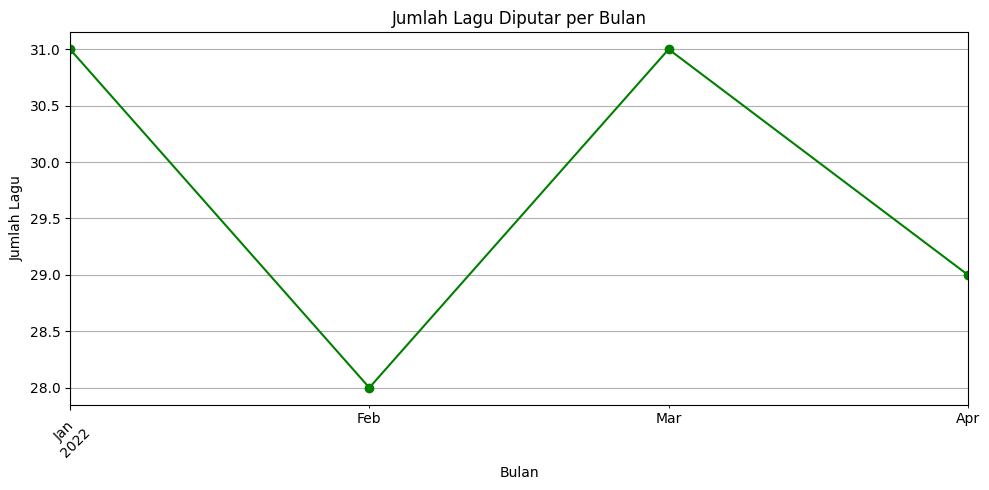

In [11]:
# Ubah kolom 'Tanggal' jadi format datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'], errors='coerce')

# Tambahkan kolom 'Bulan'
df['Bulan'] = df['Tanggal'].dt.to_period('M')

# Hitung jumlah lagu per bulan
lagu_per_bulan = df['Bulan'].value_counts().sort_index()

# Plot line chart
plt.figure(figsize=(10,5))
lagu_per_bulan.plot(kind='line', marker='o', color='green')
plt.title('Jumlah Lagu Diputar per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Lagu')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

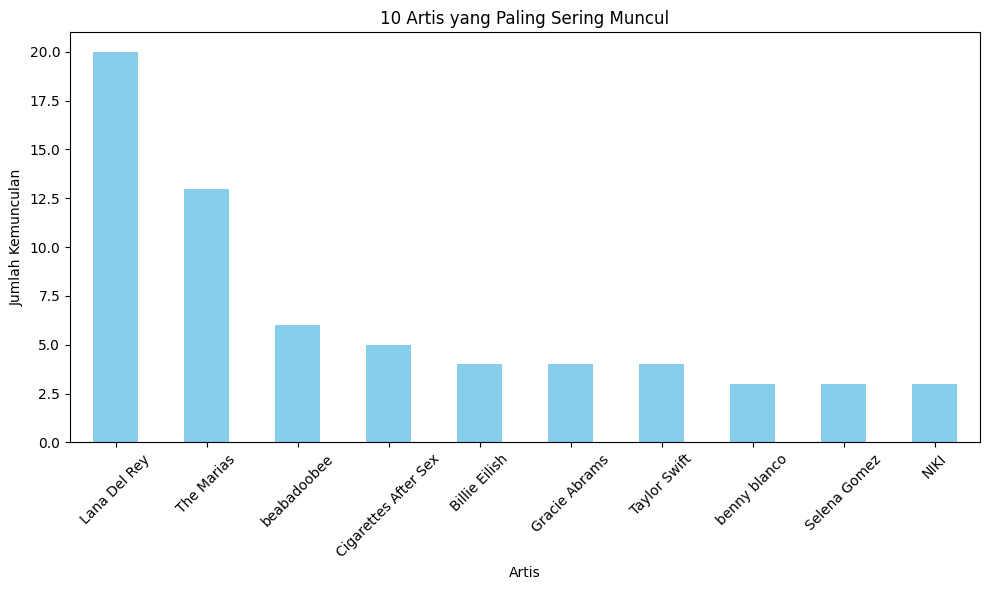

In [12]:
# Pisahkan jika ada banyak artis dalam satu lagu
from collections import Counter

# Gabungkan semua artis jadi satu list
semua_artis = df['Artis'].dropna().str.split(', ')
semua_artis = semua_artis.explode()

# Hitung frekuensi kemunculan tiap artis
artis_terpopuler = semua_artis.value_counts().head(10)

# Bar chart
plt.figure(figsize=(10,6))
artis_terpopuler.plot(kind='bar', color='skyblue')
plt.title('10 Artis yang Paling Sering Muncul')
plt.xlabel('Artis')
plt.ylabel('Jumlah Kemunculan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
print("Jumlah total lagu:", len(df))
print("Jumlah artis unik:", df['Artis'].nunique())

Jumlah total lagu: 119
Jumlah artis unik: 64
